# *Introduction to the hands-on project:* 
# Cognitive skills impact on fMRI restings state intrinsic connectivity

The aim of this 6-day project is to familiarize you with the basic steps of functional connectivity analysis by working with openly available tools and data.

Throughout the course example datasets will be used in these notebooks. However, all the notebooks can run the necessary code, so feel free to alter the dataset, analytic approach, visualization, etc... as much as you would like. 

## Project Schedule:

| Day    | Topic   | Notebook  |
| :------: | :------- | :--------- |
| 1 | Downloading data | `1_selecting_data.ipynb` |
| 1 | Beginning preprocessing | `2_preprocessing_mri_data.ipynb` |
| 2 | Connectivity analysis | `4_computing_connectivity.ipynb` |
| 3 | Working with behavioral data | `3_behavioral_data.ipynb` |
| 4-5 | Group-level analyses | `5_group-level_analysis.ipynb` |
| 6 | Data visualization techniques | `6_visualizing_results.ipynb` |

# 1. Selecting data

There is plenty of openly available MRI and behavioral data openly available for download.  
To begin, using the [Chrome browser](https://www.google.com/chrome/), go to: [openneuro.org](https://www.openneuro.org)  

One of the advantages of all data available at [openneuro.org](https://www.openneuro.org) is that it is already prepared in [BIDS format](https://bids.neuroimaging.io), which is a standard directory structure and file naming convention that enables the easy use of a broad range of analysis tools called [BIDS Apps](https://bids-apps.neuroimaging.io). (*We'll be using the BIDS App [fmriprep](http://fmriprep.readthedocs.io/) for MRI data preprocessing in the next section.*)  

## Choosing a dataset

When searching through [openneuro.org](https://openneuro.org), look for a dataset that has a behavioral measure that is of interest to you.  

[Available datasets at openneuro.org](https://openneuro.org/public/datasets)

Other resources for finding a BIDS-compatible dataset:
- [INDI](http://fcon_1000.projects.nitrc.org): 
- [datalad](https://www.datalad.org): 
- [Human Connectome Project (HCP)](https://www.humanconnectome.org):

## Downloading

Download the dataset, unzip it, and place it into the `data` directory. 

In [ ]:
! datalad install -g https://github.com/OpenNeuroDatasets/ds000245.git

# 3. Preprocessing the MRI data

Preprocessing of MRI data is the first stage of any analysis, and generally involves the following steps:

1. slice-timing / motion correction
2. registration
3. extracting confound regressors 

## Preprocessing using `fmriprep`

`fmriprep` allows us to use optimized pipelines...

Open a terminal window and execute the following command:

In [ ]:
# Faster version using '--sloppy' (this is only used in the course due to our tight schedule): 
docker run -ti --rm \
  -v /home/padawan/cajalcourse/ds000245:/data:ro \
  -v /home/padawan/cajalcourse/ds000245_preproc:/out \
  -v /home/padawan/cajalcourse:/fs poldracklab/fmriprep:latest \
  --fs-no-reconall  \
  --output-spaces MNI152NLin2009cAsym \
  --force-no-bbr \
  --dummy-scans 4 \
  --sloppy \
  --notrack \
  --n_cpus 6 \
  --mem_mb 12000 \
  --participant_label sub-CTL01 sub-CTL02 sub-CTL03 sub-CTL04 \
  --fs-license-file /fs/license.txt \
  /data /out participant

## Quality control

`fmriprep` outputs various **quality control** metrics on the participant-level that are viewable through an html page.

# Working with behavioral/phenotypic data

## 1. Loading the behavioral data

Locate the file containing the behavioral data `.tsv` or `.csv` file:

In [1]:
import pandas as pd

subject = 'CON02'
confounds_file = '/data/rw_eleves/CajalProject12/preproc/fmriprep/sub-%s/ses-postop/func/sub-%s_ses-postop_task-rest_desc-confounds_regressors.tsv' % (subject, subject)              



In [2]:
print(confounds_file)

/data/rw_eleves/CajalProject12/preproc/fmriprep/sub-CON02/ses-postop/func/sub-CON02_ses-postop_task-rest_desc-confounds_regressors.tsv


In [3]:
cf_all = pd.read_csv(confounds_file, delimiter='\t')

In [7]:
cf_all.columns

Index(['csf', 'csf_derivative1', 'csf_power2', 'csf_derivative1_power2',
       'white_matter', 'white_matter_derivative1',
       'white_matter_derivative1_power2', 'white_matter_power2',
       'global_signal', 'global_signal_derivative1',
       ...
       'motion_outlier05', 'motion_outlier06', 'motion_outlier07',
       'motion_outlier08', 'motion_outlier09', 'motion_outlier10',
       'motion_outlier11', 'motion_outlier12', 'motion_outlier13',
       'motion_outlier14'],
      dtype='object', length=205)

In [5]:

cf = cf_all.filter(['csf',
                    'white_matter',
                    'global_signal', 
                    'trans_x', 
                    'trans_y', 
                    'trans_z', 
                    'rot_x', 
                    'rot_y', 
                    'rot_z'], axis=1)

In [8]:

cf.to_csv(path_or_buf='/data/rw_eleves/CajalProject12/preproc/fmriprep/sub-%s/ses-postop/func/sub-%s_ses-postop_task-rest_desc-confounds_regressors_selected.csv' % (subject,subject), index=False)

In [11]:
confounds_name = '/data/rw_eleves/CajalProject12/preproc/fmriprep/sub-%s/ses-postop/func/sub-%s_ses-postop_task-rest_desc-confounds_regressors_selected.csv' % (subject,subject)


In [12]:
confounds_name

'/data/rw_eleves/CajalProject12/preproc/fmriprep/sub-CON02/ses-postop/func/sub-CON02_ses-postop_task-rest_desc-confounds_regressors_selected.csv'

In [13]:
import sklearn
import sklearn.datasets

# use load command from nilearn
# not glob, because it reorders

dataset = sklearn.datasets.base.Bunch(func=['/data/rw_eleves/CajalProject12/preproc/fmriprep/sub-%s/ses-postop/func/sub-%s_ses-postop_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (subject, subject)], 
                                      confounds=[confounds_name])



In [94]:
import sklearn
import sklearn.datasets

# use load command from nilearn
# not glob, because it reorders

dataset = sklearn.datasets.base.Bunch(func=['/data/rw_eleves/CajalProject12/ABIDE_pcp/cpac/nofilt_noglobal/Olin_0050102_func_preproc.nii.gz'], 
                                      confounds=['BABAB'])

In [95]:
dataset

{'func': ['/data/rw_eleves/CajalProject12/ABIDE_pcp/cpac/nofilt_noglobal/Olin_0050102_func_preproc.nii.gz'],
 'confounds': ['BABAB']}

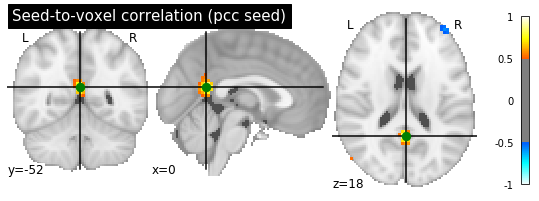

In [42]:
%matplotlib inline

import nilearn
from nilearn import plotting
import joblib
from nilearn import input_data
import numpy as np

motor_coords = [(-36, -28, 56)]
pcc_coords = [(0, -52, 18)]
ba45_coords = [(-52, 28, 2)]
precun = [(0, -66, 46)]

seed_masker = input_data.NiftiSpheresMasker(
    pcc_coords, radius=4,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.4,
    memory='nilearn_cache', memory_level=1, verbose=0)

seed_time_series = seed_masker.fit_transform(dataset.func[0], confounds=[dataset.confounds[0]])

brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=6,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.4,
    memory='nilearn_cache', memory_level=1, verbose=0)

brain_time_series = brain_masker.fit_transform(dataset.func[0], confounds=[dataset.confounds[0]]) 


seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0]
                              )

seed_to_voxel_correlations_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations.T)
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.5, vmax=1,
                                 cut_coords=pcc_coords[0],
                                 title="Seed-to-voxel correlation (pcc seed)"
                                 )

display.add_markers(marker_coords=pcc_coords, marker_color='g',
                    marker_size=70)

# At last, we save the plot as pdf.
display.savefig('pcc_coords_seed_correlation.pdf')

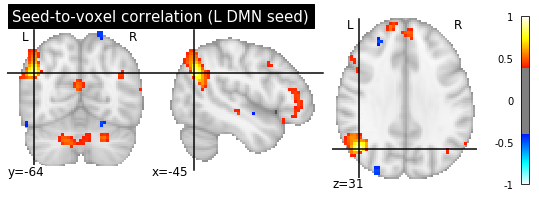

In [107]:
#Copy of the before steps for the ABIDE data
import nilearn
from nilearn import plotting
import joblib
from nilearn import input_data
import numpy as np

motor_coords = [(-36, -28, 56)]
pcc_coords = [(0, -52, 18)]
ba45_coords = [(-52, 28, 2)]
precun = [(0, -66, 46)]
L_DMN = [(-45.8, -64.78,31.84)]

seed_masker = input_data.NiftiSpheresMasker(
   L_DMN, radius=4,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2,
    memory='nilearn_cache', memory_level=1, verbose=0)

seed_time_series = seed_masker.fit_transform(dataset.func[0] )

brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=6,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2,
    memory='nilearn_cache', memory_level=1, verbose=0)

brain_time_series = brain_masker.fit_transform(dataset.func[0]) 


seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0]
                              )

seed_to_voxel_correlations_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations.T)
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.4, vmax=1,
                                 cut_coords= L_DMN[0],
                                 title="Seed-to-voxel correlation (L DMN seed)"
                                 )

display.add_markers(marker_coords=pcc_coords, marker_color='g',
                    marker_size=70)

# At last, we save the plot as pdf.
display.savefig('L_DMN_coords_seed_correlation_ABIDE_Test.pdf')

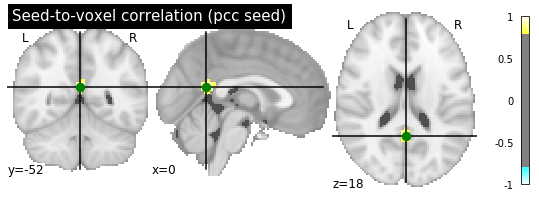

In [104]:
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.8, vmax=1,
                                 cut_coords=pcc_coords[0],
                                 title="Seed-to-voxel correlation (pcc seed)"
                                 )

display.add_markers(marker_coords=pcc_coords, marker_color='g',
                    marker_size=70)

# At last, we save the plot as pdf.
display.savefig('pcc_coords_seed_correlation_ABIDE_Test.pdf')

In [73]:
# function to define a seed using its MNI coordinates and return voxel-wise correlations 
# with the seed, and save the image

def seed_cor(coords,name):
    seed_masker = input_data.NiftiSpheresMasker(
    coords, radius=4,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.4,
    memory='nilearn_cache', memory_level=1, verbose=0)

    seed_time_series = seed_masker.fit_transform(dataset.func[0], confounds=[dataset.confounds[0]])

    brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=6,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.4,
    memory='nilearn_cache', memory_level=1, verbose=0)

    brain_time_series = brain_masker.fit_transform(dataset.func[0], confounds=[dataset.confounds[0]]) 


    seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0]
                              )

    seed_to_voxel_correlations_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations.T)
    display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.5, vmax=1,
                                 cut_coords=coords[0],
                                 title="Seed-to-voxel correlation %s" % name
                                 )

    display.add_markers(marker_coords=coords, marker_color='g',
                    marker_size=70)

# At last, we save the plot as pdf.
    display.savefig('%s_coords_seed_correlation.pdf' % name)

    return display


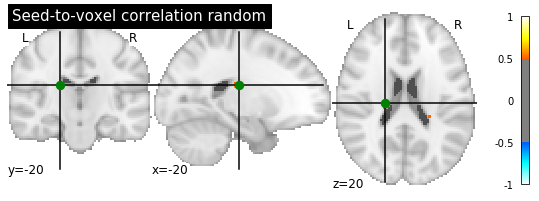

In [84]:
seed_cor(coords=[(-20, -20, 20)],name = 'random')

In [111]:
seed_to_voxel_correlations_fisher_z = np.arctanh(seed_to_voxel_correlations)
print("Seed-to-voxel correlation Fisher-z transformed: min = %.3f; max = %.3f"
      % (seed_to_voxel_correlations_fisher_z.min(),
         seed_to_voxel_correlations_fisher_z.max()
         )
      )

# Finally, we can tranform the correlation array back to a Nifti image
# object, that we can save.
seed_to_voxel_correlations_fisher_z_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations_fisher_z.T)
seed_to_voxel_correlations_fisher_z_img.to_filename(
    'L_DMN_ABIDE_seed_correlation_z.nii.gz') 

view = plotting.view_img_on_surf(seed_to_voxel_correlations_fisher_z_img, 
                                 threshold='80%')
view

Seed-to-voxel correlation Fisher-z transformed: min = -0.576; max = 1.641


/home/padawan/miniconda3/envs/cajal/lib/python3.7/site-packages/nilearn/plotting/js_plotting_utils.py:103: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than 10 '


### Day 3

Starting to develop our connectivity matrices for the ABIDE data set

In [8]:
from nilearn import datasets

/home/padawan/miniconda3/envs/cajal/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Compute connectivity matrix on single dataset

In [9]:
# Fetch one subject only first

ABIDE_data = datasets.fetch_abide_pcp(data_dir='/data/rw_eleves/CajalProject12', pipeline='cpac', 
                                 n_subjects = 50, band_pass_filtering=False, global_signal_regression=False, derivatives=['func_preproc'], 
                                 quality_checked=True, url=None, verbose=0)

"""                                    
#use the phentoypic data collected to define the subjects we want to download: here we're selecting only participants from Pittsburgh site
SUBS = []
for i in range(len(ABIDE_data.phenotypic)):
    if ABIDE_data.phenotypic[i][5].decode("UTF-8") == "PITT":        #need to decode string variable
        SUBS.append(ABIDE_data.phenotypic[i][2])
 
    # Fetch the rest of the data

ABIDE_data = datasets.fetch_abide_pcp(data_dir='/data/rw_eleves/CajalProject12', pipeline='cpac', 
                                 band_pass_filtering=False, global_signal_regression=False, derivatives=['func_preproc'], 
                                 quality_checked=True, SUB_ID=[SUBS], url=None, verbose=0)"""



/home/padawan/miniconda3/envs/cajal/lib/python3.7/site-packages/numpy/lib/npyio.py:2322: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


'                                    \n#use the phentoypic data collected to define the subjects we want to download: here we\'re selecting only participants from Pittsburgh site\nSUBS = []\nfor i in range(len(ABIDE_data.phenotypic)):\n    if ABIDE_data.phenotypic[i][5].decode("UTF-8") == "PITT":        #need to decode string variable\n        SUBS.append(ABIDE_data.phenotypic[i][2])\n \n    # Fetch the rest of the data\n\nABIDE_data = datasets.fetch_abide_pcp(data_dir=\'/data/rw_eleves/CajalProject12\', pipeline=\'cpac\', \n                                 band_pass_filtering=False, global_signal_regression=False, derivatives=[\'func_preproc\'], \n                                 quality_checked=True, SUB_ID=[SUBS], url=None, verbose=0)'

In [10]:
# Fetch the ROI-atlas (Harvard Oxford)

atlas = datasets.fetch_atlas_msdl()
atlas_filename = atlas.maps
labels = atlas['labels']

In [11]:
# Defining ROIs as seeds
from nilearn.input_data import NiftiMapsMasker

masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True, smoothing_fwhm=6,
    detrend=True, low_pass=0.1, high_pass=0.01, t_r=2,
    memory='nilearn_cache', verbose=5)

time_series = masker.fit_transform(ABIDE_data.func_preproc[0])

[NiftiMapsMasker.fit_transform] loading regions from /home/padawan/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps


/home/padawan/miniconda3/envs/cajal/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.4s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.7s, 0.0min
[Memory]1.2s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


# Only for n=1

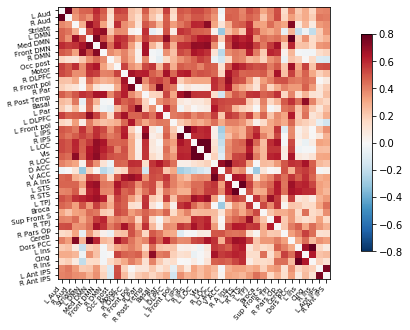

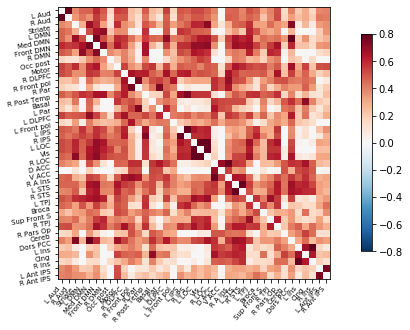

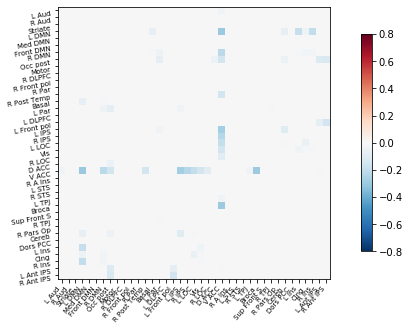

In [35]:
# Calculate correlation example for n=1
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Define positive matrix
correlation_matrix_pos = correlation_matrix.copy()
correlation_matrix_pos[correlation_matrix < 0.0] = 0.0

# Define negative matrix
correlation_matrix_neg = correlation_matrix.copy()
correlation_matrix_neg[correlation_matrix > 0.0] = 0.0

# Display the full correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True,
                     vmax=0.8, vmin=-0.8)

# Display the positive correlation matrix
np.fill_diagonal(correlation_matrix_pos, 0)
plotting.plot_matrix(correlation_matrix_pos, labels=labels, colorbar=True,
                     vmax=0.8, vmin=-0.8)


# Display the negative correlation matrix
np.fill_diagonal(correlation_matrix_neg, 0)
plotting.plot_matrix(correlation_matrix_neg, labels=labels, colorbar=True,
                     vmax=0.8, vmin=-0.8)

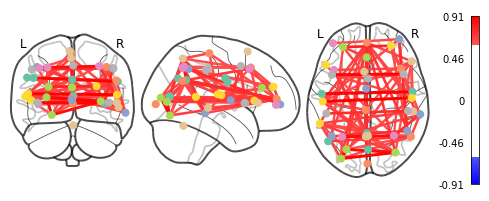

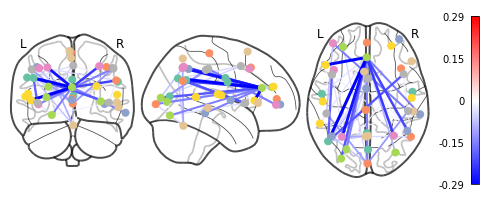

In [36]:
# Plotting the connectome
from nilearn import plotting
coords = atlas.region_coords

# We threshold to keep only the 20% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(correlation_matrix_pos, coords,
                         edge_threshold="90%", colorbar=True)

plotting.show()

# We threshold to keep only the 20% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(correlation_matrix_neg, coords,
                         edge_threshold="90%", colorbar=True)

plotting.show()

# 3. Computing functional connectivity matrices

Now that we have our preprocessed data, we can begin the functional connectivity analysis.  

We begin by loading the data:

[NeuroSynth](http://neurosynth.org/locations/)

In [12]:
# Matrix plotting from Nilearn: nilearn.plotting.plot_matrix
import numpy as np
import matplotlib.pylab as plt

def plot_matrices(matrices, matrix_kind):
    n_matrices = len(matrices)
    fig = plt.figure(figsize=(n_matrices * 4, 4))
    for n_subject, matrix in enumerate(matrices):
        plt.subplot(1, n_matrices, n_subject + 1)
        matrix = matrix.copy()  # avoid side effects
        # Set diagonal to zero, for better visualization
        np.fill_diagonal(matrix, 0)
        vmax = np.max(np.abs(matrix))
        title = '{0}, subject {1}'.format(matrix_kind, n_subject)
        plotting.plot_matrix(matrix, vmin=-vmax, vmax=vmax, cmap='RdBu_r',
                             title=title, figure=fig, colorbar=True)

In [13]:
msdl_data = datasets.fetch_atlas_msdl()
msdl_coords = msdl_data.region_coords
n_regions = len(msdl_coords)
print('MSDL has {0} ROIs, part of the following networks :\n{1}.'.format(
    n_regions, msdl_data.networks))

MSDL has 39 ROIs, part of the following networks :
[b'Aud', b'Aud', b'Striate', b'DMN', b'DMN', b'DMN', b'DMN', b'Occ post', b'Motor', b'R V Att', b'R V Att', b'R V Att', b'R V Att', b'Basal', b'L V Att', b'L V Att', b'L V Att', b'D Att', b'D Att', b'Vis Sec', b'Vis Sec', b'Vis Sec', b'Salience', b'Salience', b'Salience', b'Temporal', b'Temporal', b'Language', b'Language', b'Language', b'Language', b'Language', b'Cereb', b'Dors PCC', b'Cing-Ins', b'Cing-Ins', b'Cing-Ins', b'Ant IPS', b'Ant IPS'].


/home/padawan/miniconda3/envs/cajal/lib/python3.7/site-packages/numpy/lib/npyio.py:2322: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [14]:
from nilearn import input_data

masker = input_data.NiftiMapsMasker(
    msdl_data.maps, resampling_target="data", t_r=2, detrend=True,
    low_pass=.1, high_pass=.01, memory='nilearn_cache', memory_level=1)

In [15]:
# Pulling out the groups + nec info
ABIDE_subjects = []
pooled_subjects = []
control_subjects = []
ABIDE_labels = []  # 1 if Autism, 2 if control
for func_file,  phenotypic in zip(
        ABIDE_data.func_preproc, ABIDE_data.phenotypic):
    time_series = masker.fit_transform(func_file)
    pooled_subjects.append(time_series)
    is_ABIDE = phenotypic['DX_GROUP']
    if is_ABIDE == 1:
        ABIDE_subjects.append(time_series)
    else:
        control_subjects.append(time_series)
    
    ABIDE_labels.append(is_ABIDE)

print('Data has {0} ABIDE subjects.'.format(len(ABIDE_subjects)))
print('Data has {0} control subjects.'.format(len(control_subjects)))

Data has 23 ABIDE subjects.
Data has 27 control subjects.


In [17]:
from nilearn.connectome import ConnectivityMeasure

Correlations of ABIDE patients are stacked in an array of shape (23, 39, 39)
Mean correlation has shape (39, 39).


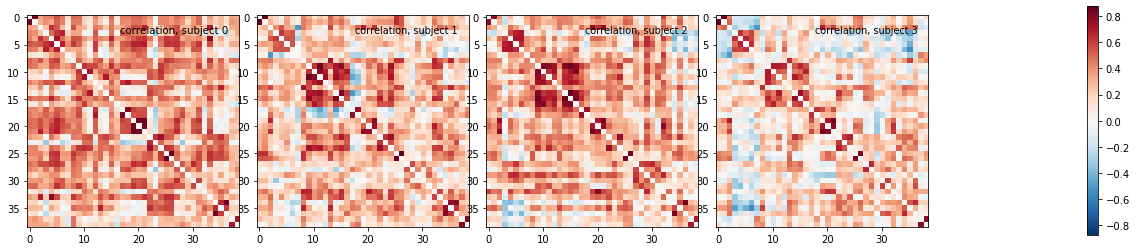

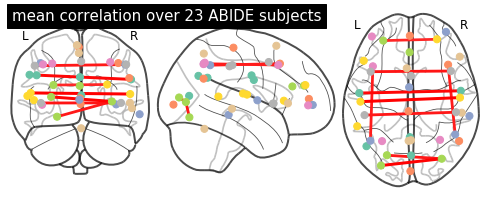

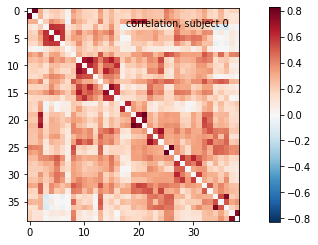

In [18]:
#creating correlation matrices for Autism subjects

correlation_measure_ABIDE = ConnectivityMeasure(kind='correlation')
correlation_matrices_ABIDE = correlation_measure_ABIDE.fit_transform(ABIDE_subjects)

# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of ABIDE patients are stacked in an array of shape {0}'
      .format(correlation_matrices_ABIDE.shape))

#Take mean correlation across autism group

mean_correlation_matrix_ABIDE = correlation_measure_ABIDE.mean_
print('Mean correlation has shape {0}.'.format(mean_correlation_matrix_ABIDE.shape))

from nilearn import plotting

#Plot the first 4 autism subjects and the the mean connectome across the autism group
plot_matrices(correlation_matrices_ABIDE[:4], 'correlation')
plotting.plot_connectome(mean_correlation_matrix_ABIDE, msdl_coords, edge_threshold = 0.7,
                         title='mean correlation over 23 ABIDE subjects')

mean_correlation_matrix_extra_ABIDE = np.expand_dims(mean_correlation_matrix_ABIDE, axis=0)
plot_matrices(mean_correlation_matrix_extra_ABIDE, 'correlation')

Correlations of control patients are stacked in an array of shape (27, 39, 39)
Mean correlation has shape (39, 39).


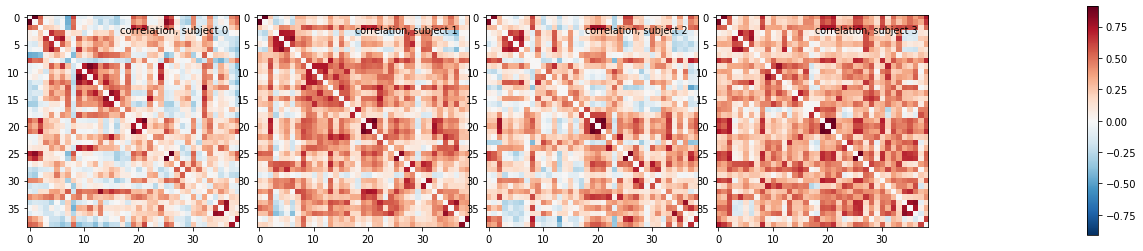

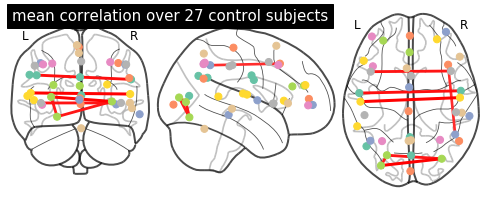

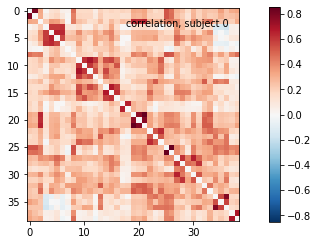

In [19]:
#creating correlation matrices for control subjects
correlation_measure_control = ConnectivityMeasure(kind='correlation')
correlation_matrices_control = correlation_measure_control.fit_transform(control_subjects)

# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of control patients are stacked in an array of shape {0}'
      .format(correlation_matrices_control.shape))

#Take mean correlation across control group

mean_correlation_matrix_control = correlation_measure_control.mean_
print('Mean correlation has shape {0}.'.format(mean_correlation_matrix_control.shape))

#Plot the first 4 control subjects and the the mean connectome across the control group
plot_matrices(correlation_matrices_control[:4], 'correlation')
plotting.plot_connectome(mean_correlation_matrix_control, msdl_coords, edge_threshold = 0.7,
                         title='mean correlation over 27 control subjects')

mean_correlation_matrix_extra_control = np.expand_dims(mean_correlation_matrix_control, axis=0)
plot_matrices(mean_correlation_matrix_extra_control, 'correlation')

# ---Day 4---

## Partial and Tangent correlation for both groups + plots

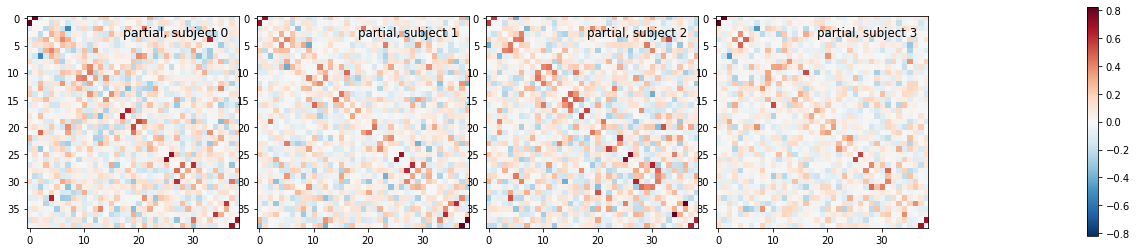

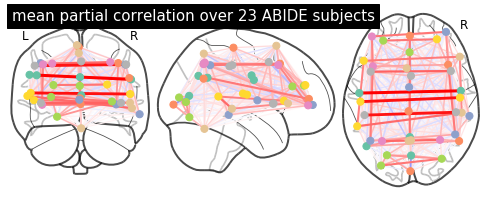

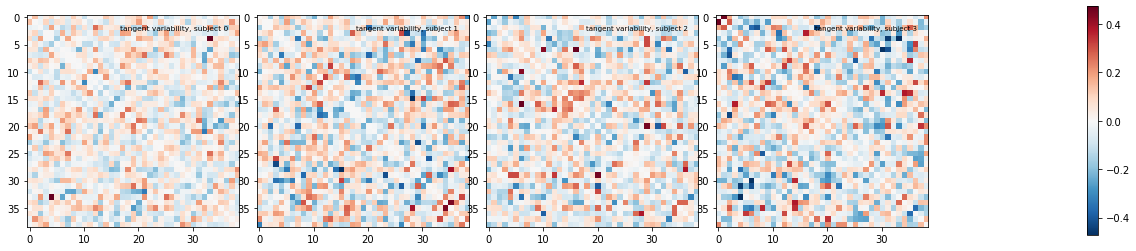

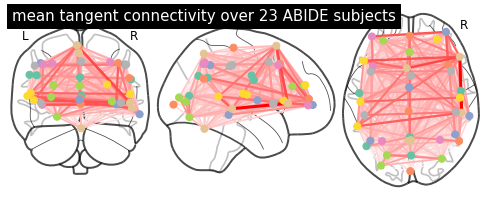

In [20]:
#partial and tangent correlation for the Autism group

partial_correlation_measure_ABIDE = ConnectivityMeasure(kind='partial correlation')

partial_correlation_matrices_ABIDE = partial_correlation_measure_ABIDE.fit_transform(
    ABIDE_subjects)

plot_matrices(partial_correlation_matrices_ABIDE[:4], 'partial')
plotting.plot_connectome(
    partial_correlation_measure_ABIDE.mean_, msdl_coords,
    title='mean partial correlation over 23 ABIDE subjects')

tangent_measure_ABIDE = ConnectivityMeasure(kind='tangent')
tangent_matrices_ABIDE = tangent_measure_ABIDE.fit_transform(ABIDE_subjects)
plot_matrices(tangent_matrices_ABIDE[:4], 'tangent variability')
plotting.plot_connectome(
    tangent_measure_ABIDE.mean_, msdl_coords,
    title='mean tangent connectivity over 23 ABIDE subjects')

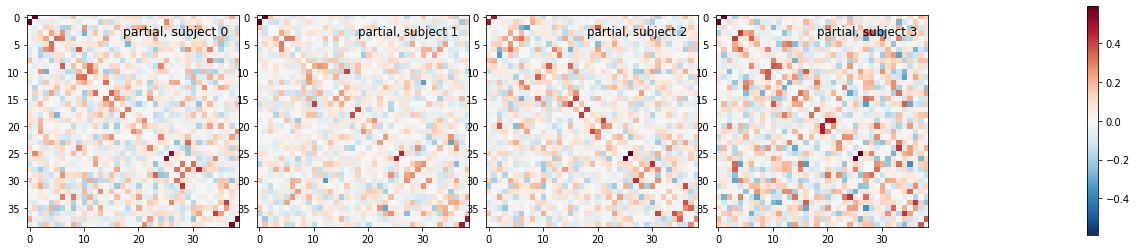

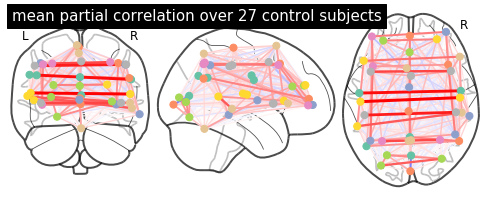

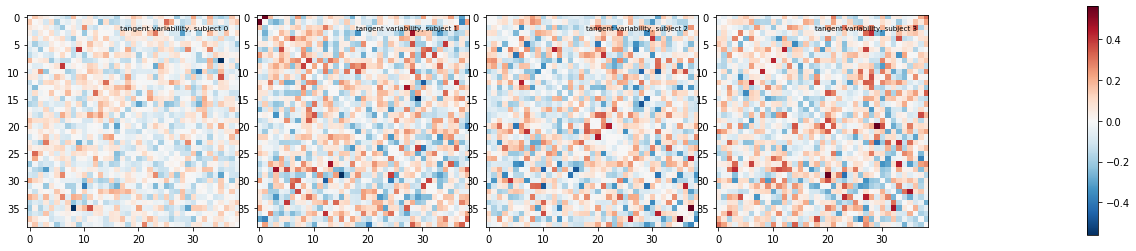

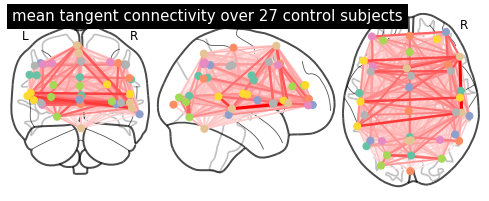

In [21]:
#partial and tangent correlation for the Control group

partial_correlation_measure_control = ConnectivityMeasure(kind='partial correlation')

partial_correlation_matrices_control = partial_correlation_measure_control.fit_transform(
    control_subjects)

plot_matrices(partial_correlation_matrices_control[:4], 'partial')
plotting.plot_connectome(
    partial_correlation_measure_control.mean_, msdl_coords,
    title='mean partial correlation over 27 control subjects')

tangent_measure_control = ConnectivityMeasure(kind='tangent')
tangent_matrices_control = tangent_measure_control.fit_transform(control_subjects)
plot_matrices(tangent_matrices_control[:4], 'tangent variability')
plotting.plot_connectome(
    tangent_measure_control.mean_, msdl_coords,
    title='mean tangent connectivity over 27 control subjects')

In [22]:
connectivity_biomarkers = {}
kinds = ['correlation', 'partial correlation', 'tangent']
for kind in kinds:
    conn_measure = ConnectivityMeasure(kind=kind, vectorize=True)
    connectivity_biomarkers[kind] = conn_measure.fit_transform(pooled_subjects)

# For each kind, all individual coefficients are stacked in a unique 2D matrix.
print('{0} correlation biomarkers for each subject.'.format(
    connectivity_biomarkers['correlation'].shape[1]))

780 correlation biomarkers for each subject.


In [23]:
from sklearn.model_selection import StratifiedKFold

"""
classes = ['{0}{1}'.format(ABIDE_label)
           for ABIDE_label in zip(ABIDE_labels)]
"""

cv = StratifiedKFold(n_splits=3)

In [24]:
# Note that in cv.split(X, y),
# providing y is sufficient to generate the splits and
# hence np.zeros(n_samples) may be used as a placeholder for X
# instead of actual training data.
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

mean_scores = []
for kind in kinds:
    svc = LinearSVC(random_state=0)
    cv_scores = cross_val_score(svc,
                                connectivity_biomarkers[kind],
                                y=ABIDE_labels,
                                cv=cv,
                                groups=ABIDE_labels,
                                scoring='accuracy',
                                )
    mean_scores.append(cv_scores.mean())


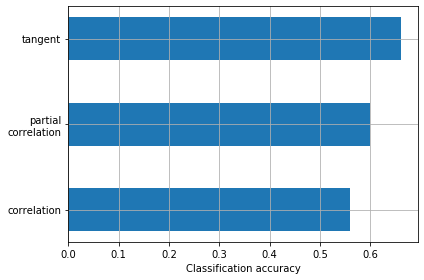

In [25]:
from nilearn.plotting import show

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05)
yticks = [kind.replace(' ', '\n') for kind in kinds]
plt.yticks(positions, yticks)
plt.xlabel('Classification accuracy')
plt.grid(True)
plt.tight_layout()

show()

In [26]:
# We use glob and split to only get the Sub_IDs for the Pitt group that passed QC

import glob,os

# Use glob to get the names from the folder
path = '/data/rw_eleves/CajalProject12/ABIDE_pcp/cpac/nofilt_noglobal'

files = [f for f in glob.glob(path + "**/*.nii.gz", recursive=True)]

# Get and sort subject ID
Pittlist=[]
for test in files:
    base=os.path.basename(test)
    basenames = base.split('_')
    if basenames[0]=="Pitt":
        Pittlist.append(int(basenames[1]))

Pittlist = list(np.sort(Pittlist))

# Working with behavioral/phenotypic data


## 1. Loading the behavioral data

In [27]:
# Locate the file containing the behavioral data `.tsv` or `.csv` file:

import pandas as pd

behav = pd.read_csv('/data/rw_eleves/CajalProject12/ABIDE_pcp/Phenotypic_V1_0b_preprocessed1.csv', delimiter=',')

behav_short = behav.filter(['SUB_ID',
                   'subject', 'SITE_ID','DX_GROUP', 'DSM_IV_TR', 'AGE_AT_SCAN',  'SEX',
             'HANDEDNESS_CATEGORY', 'FIQ','VIQ', 'PIQ', 'FIQ_TEST_TYPE', 'VIQ_TEST_TYPE',
             'PIQ_TEST_TYPE',], axis=1)

behav_short = behav_short[behav_short['SUB_ID'].isin(Pittlist)] 

## 2. Check the distributions

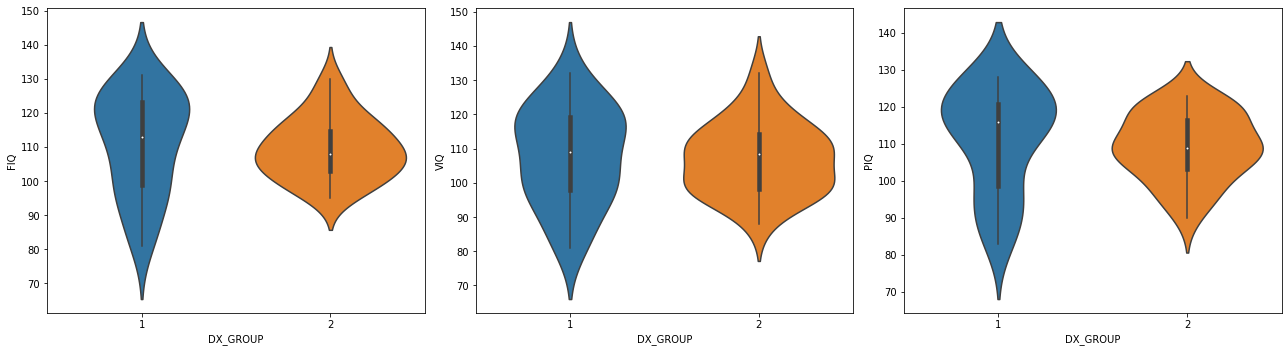

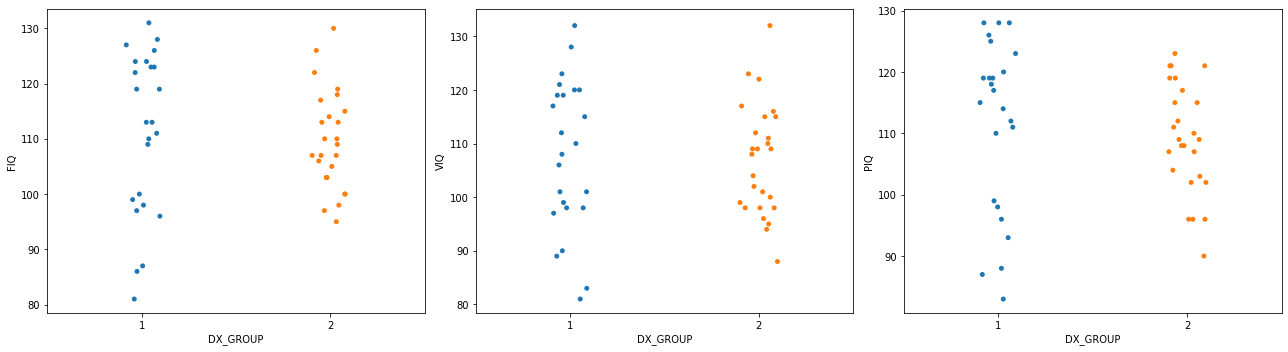

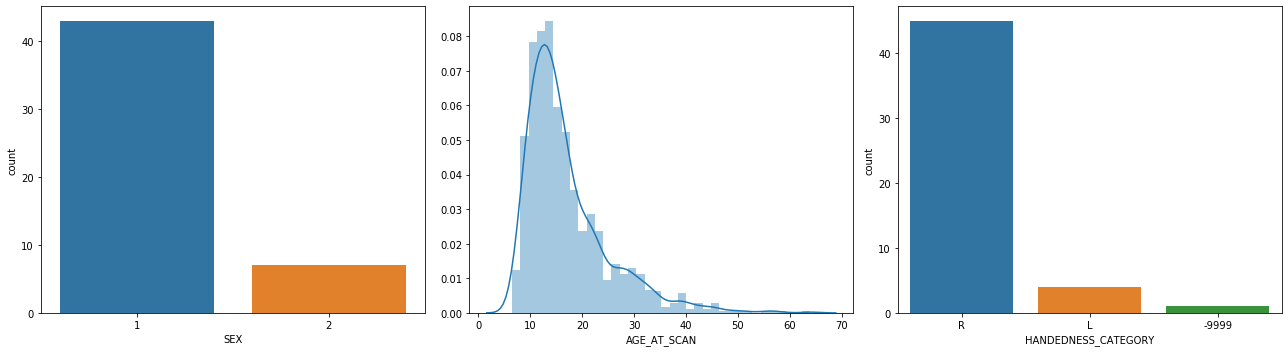

In [28]:
# Locate the measure-of-interest:

%matplotlib inline

# Next, plot a histogram of the values:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,5))
sns.violinplot(x=behav_short.DX_GROUP,y=behav_short.FIQ, ax=ax1)
sns.violinplot(x=behav_short.DX_GROUP,y=behav_short.VIQ,ax=ax2)
sns.violinplot(x=behav_short.DX_GROUP,y=behav_short.PIQ,ax=ax3)

fg, (ax4, ax5, ax6) = plt.subplots(1,3, figsize=(18,5))
sns.catplot(x="DX_GROUP",y="FIQ",data=behav_short, ax=ax4)
sns.catplot(x="DX_GROUP",y="VIQ",data=behav_short,ax=ax5)
sns.catplot(x="DX_GROUP",y="PIQ",data=behav_short,ax=ax6)
plt.close(4)
plt.close(5)
plt.close(3)

# needs to be fixed (to go on top)
'''
fh, (ax4, ax5, ax6) = plt.subplots(1,3, figsize=(18,5))
sns.distplot(behav_short.FIQ)
plt.show()
sns.distplot(behav_short.VIQ)
plt.show()
sns.distplot(behav_short.PIQ)
plt.show()
'''

f.tight_layout()
fg.tight_layout()


K, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,5))

sns.countplot(x='SEX', data=behav_short, ax=ax1)
sns.distplot(behav.AGE_AT_SCAN, ax=ax2)
sns.countplot(x='HANDEDNESS_CATEGORY',data=behav_short, ax=ax3 )

K.tight_layout()
plt.show()

# Actual RS + behav

## Q1: Relationship between IQ and

Does IQ influence resting state connectivity in people with/without ASD differently?
Is there an interaction between IQ and diagnostics?

### Similarity matrix --> modularity index

In [30]:
from community import community_louvain
import networkx as nx

In [57]:
def modfunction(data): 
    Modscores=[] 

    for person in data:
        G = nx.from_numpy_matrix(person)
        part = community_louvain.best_partition(G,randomize=None)
        mod = community_louvain.modularity(part,G)
        Modscores.append(mod)    
    return Modscores


# Per subject: calculate the modscore 100x. Use that mean to look at group diff.

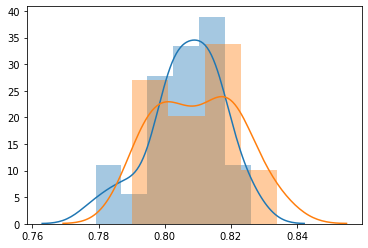

In [61]:
Modscore_Autism = modfunction(partial_correlation_matrices_ABIDE)
Modscore_control = modfunction(partial_correlation_matrices_control)

# Plot the distributions
sns.distplot(Modscore_Autism)
sns.distplot(Modscore_control)

In [52]:
from scipy import stats

# Statistics group-level
stats.ttest_ind(Modscore_Autism,Modscore_control)

Ttest_indResult(statistic=-1.169689006419162, pvalue=0.24790160538498957)

### For Wednesday

Look at differences in modularity between the groups
Explore relationship between IQ and modularity in each group



## Single Value Decompensation



In [64]:
np.shape(pooled_subjects[0])

(196, 39)

In [66]:
import sklearn.decomposition



In [121]:
pca_outputs = []

for person in pooled_subjects:
    pca = sklearn.decomposition.PCA()
    pca.fit(person)
    pca_outputs.append(pca.explained_variance_ratio_[1])
        

In [122]:
Autism_pca = [pca_outputs[i] for i in np.where(behav_short.DX_GROUP==1)[0]]
Control_pca =  [pca_outputs[i] for i in np.where(behav_short.DX_GROUP==2)[0]]
stats.ttest_ind(Autism_pca,Control_pca)

Ttest_indResult(statistic=0.4419017412831854, pvalue=0.6605449011715301)

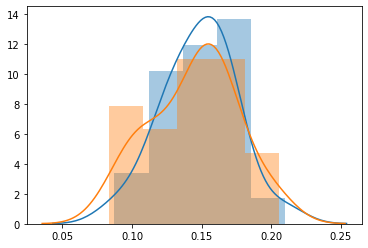

In [123]:
sns.distplot(Autism_pca)
sns.distplot(Control_pca)

## Amplitude of Low Frequency Fluctuations


In [132]:
from scipy import signal

In [125]:
 #Need data on voxel level that has not been bandpass filtered
#re-fetching just one person first to try

ABIDE_data_for_ALLF = datasets.fetch_abide_pcp(data_dir='/data/rw_eleves/CajalProject12', pipeline='cpac', 
                                 n_subjects = 1, band_pass_filtering=False, global_signal_regression=False, derivatives=['func_preproc'], 
                                 quality_checked=True, url=None, verbose=0)

In [126]:
brain_masker = input_data.NiftiMasker(
               detrend=True, standardize=True, t_r=2,
    memory='nilearn_cache', memory_level=1, verbose=0)

brain_time_seriesfor_ALFF = brain_masker.fit_transform(ABIDE_data_for_ALLF.func_preproc[0]) 

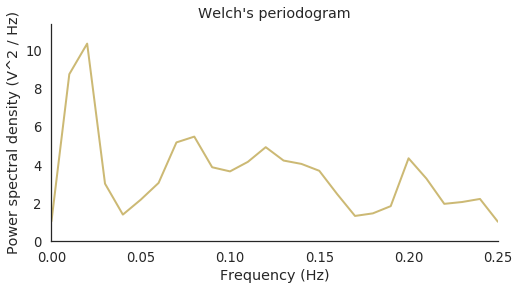

In [150]:
# Define sampling frequency and time vector
# sampling frequency will be 1/TR

sf = 0.5  
time = np.shape(brain_time_seriesfor_ALFF)[0]/sf

win = 100 * sf
freqs, psd = signal.welch(brain_time_seriesfor_ALFF[:,3400], sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='y', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()



In [145]:
#Try again on one of regional time series


masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True, 
                         detrend=True, t_r=2, memory='nilearn_cache', verbose=5)

time_series_by_region = masker.fit_transform(ABIDE_data_for_ALLF.func_preproc[0])

[NiftiMapsMasker.fit_transform] loading regions from /home/padawan/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.0s, 0.0min    : Loading resample_img...


/home/padawan/miniconda3/envs/cajal/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


________________________________________resample_img cache loaded - 0.8s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/data/rw_eleves/CajalProject12/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050003_func_preproc.nii.gz', 
{ 'allow_overlap': True,
  'detrend': True,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'maps_img': '/home/padawan/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': 2,
  'target_affine': None,
  'target_shape': None}, confounds=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from /data/rw_eleves/CajalProject12/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050003_func_preproc.nii.gz
[NiftiMapsMasker.transform_single_imgs] Extracting region signals
[NiftiMapsMasker.t

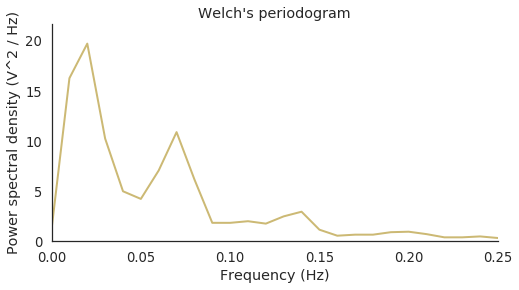

In [149]:
sf = 0.5  
time = np.shape(brain_time_seriesfor_ALFF)[0]/sf

win = 100 * sf
freqs, psd = signal.welch(time_series_by_region[:,30], sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='y', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()

In [154]:
from scipy.integrate import simps

# Define delta lower and upper limits of the frequencies
low, high = 0, 0.05

# Find intersecting values in frequency vector
idx_testband = np.logical_and(freqs >= low, freqs <= high)

freq_res = freqs[5] - freqs[0] 


# Compute the absolute power by approximating the area under the curve
testband_power = simps(psd[idx_testband], dx=freq_res)
print('Absolute testband power: %.3f uV^2' % testband_power)

Absolute testband power: 1.283 uV^2


## Dictionary learning example

For network ICA analyses


https://nilearn.github.io/auto_examples/03_connectivity/plot_compare_resting_state_decomposition.html#sphx-glr-auto-examples-03-connectivity-plot-compare-resting-state-decomposition-py

In [166]:
Autism_FIQ = [behav_short.FIQ for i in np.where(behav_short.DX_GROUP==1)[0]]
Control_FIQ = [behav_short.FIQ for i in np.where(behav_short.DX_GROUP==2)[0]]

Autism_FIQMat = np.asarray(Autism_FIQ)
Control_FIQMat = np.asarray(Control_FIQ)

Autism_FIQMat = Autism_FIQMat[~np.isnan(Autism_FIQMat)]
Control_FIQMat = Control_FIQMat[~np.isnan(Control_FIQMat)]

stats.ttest_ind(Autism_FIQMat, Control_FIQMat)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [164]:
Autism_FIQMat

array([124., 113., 119., ..., 124., 117., 126.])

In [167]:
len(Control_FIQMat)

1300